In [1]:
import matplotlib.pyplot as plt
import mpl_finance as mpf
import numpy as np
import pandas as pd
from twstock import Stock

In [2]:
tsmc = Stock('2330')
tsmc.fetch_from(2018, 1)

[Data(date=datetime.datetime(2018, 1, 2, 0, 0), capacity=18055269, turnover=4188555408, open=231.5, high=232.5, low=231.0, close=232.5, change=3.0, transaction=9954),
 Data(date=datetime.datetime(2018, 1, 3, 0, 0), capacity=31706091, turnover=7504382512, open=236.0, high=238.0, low=235.5, close=237.0, change=4.5, transaction=13633),
 Data(date=datetime.datetime(2018, 1, 4, 0, 0), capacity=29179613, turnover=6963192636, open=240.0, high=240.0, low=236.5, close=239.5, change=2.5, transaction=10953),
 Data(date=datetime.datetime(2018, 1, 5, 0, 0), capacity=23721255, turnover=5681934695, open=240.0, high=240.0, low=238.0, close=240.0, change=0.5, transaction=8659),
 Data(date=datetime.datetime(2018, 1, 8, 0, 0), capacity=21846692, turnover=5281823362, open=242.0, high=242.5, low=240.5, close=242.0, change=2.0, transaction=10251),
 Data(date=datetime.datetime(2018, 1, 9, 0, 0), capacity=19043123, turnover=4588314012, open=242.0, high=242.0, low=239.5, close=242.0, change=0.0, transaction=71

In [3]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)

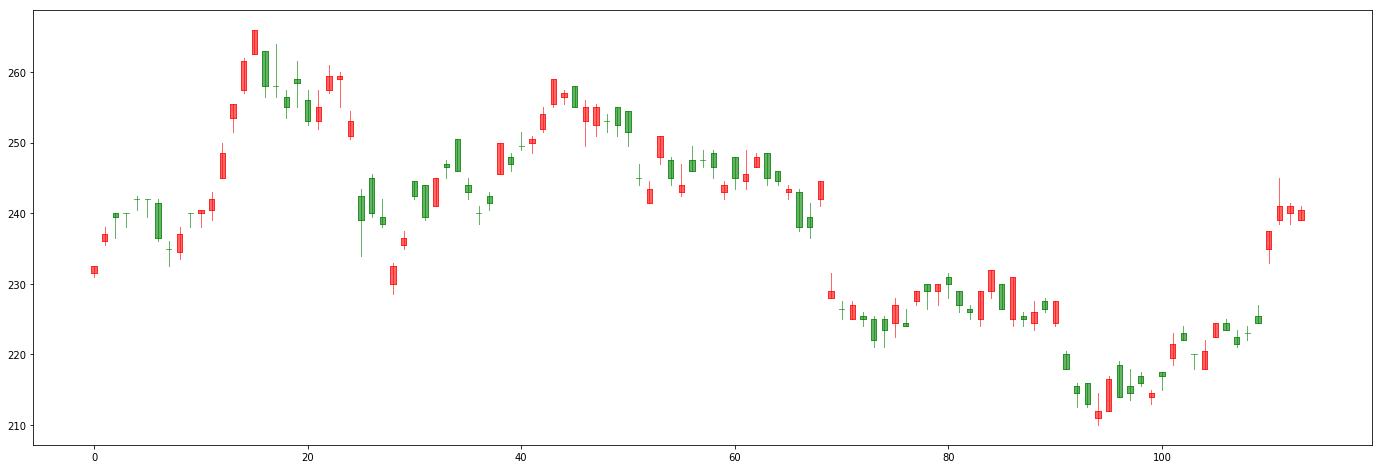

In [4]:
mpf.candlestick2_ochl(ax, tsmc.open, tsmc.close, tsmc.high, tsmc.low,
                      width=0.5, colorup='r', colordown='green',
                      alpha=0.6)
plt.show()

In [5]:
tsmc_date = pd.DataFrame(tsmc.date,columns=['date'])
tsmc_date.head()

,date
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08


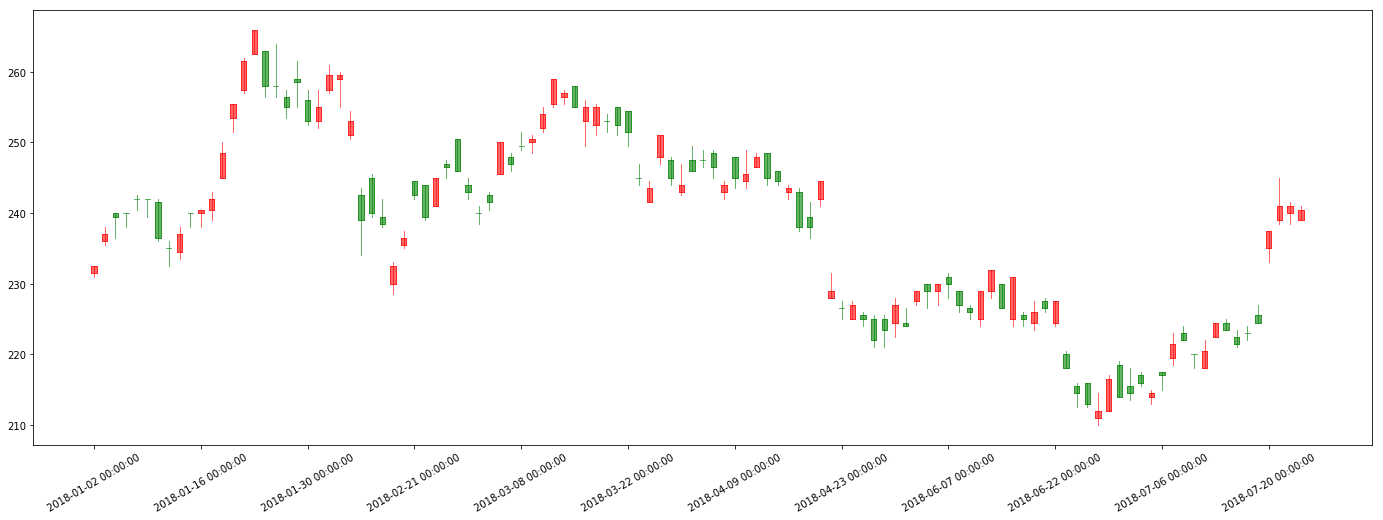

In [6]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)

mpf.candlestick2_ochl(ax, tsmc.open, tsmc.close, tsmc.high, tsmc.low,
                      width=0.5, colorup='r', colordown='green',
                      alpha=0.6)
ax.set_xticks(range(0, len(tsmc_date['date']), 10))
ax.set_xticklabels(tsmc_date['date'][::10], rotation=30)

plt.show()

In [7]:
tsmc_5day = tsmc.moving_average(tsmc.price,5)
tsmc_10day = tsmc.moving_average(tsmc.price,10)

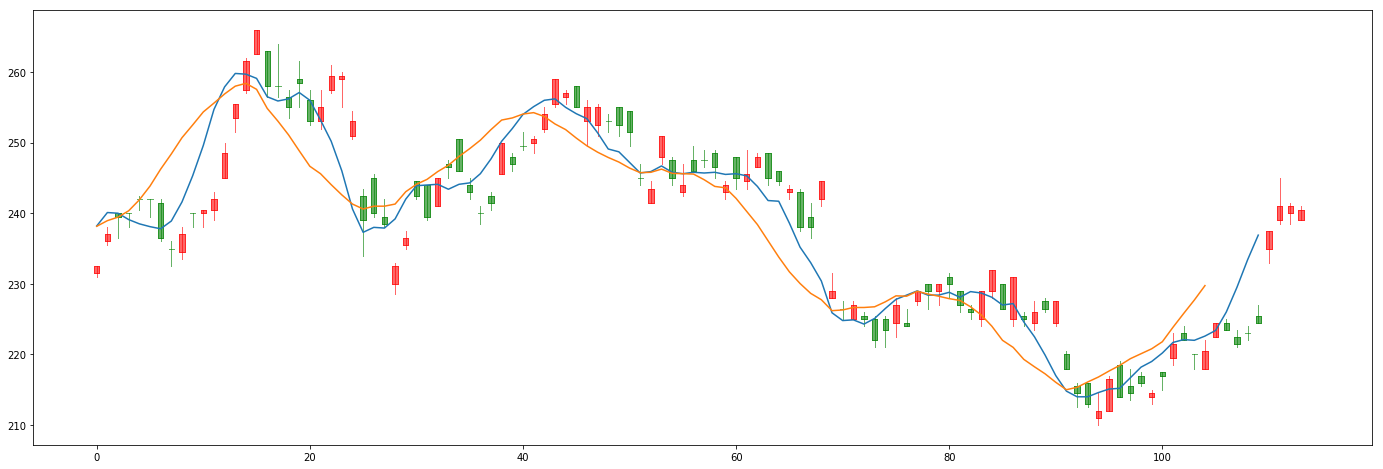

In [8]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
mpf.candlestick2_ochl(ax, tsmc.open, tsmc.close, tsmc.high, tsmc.low,
                      width=0.5, colorup='r', colordown='green',
                      alpha=0.6)
ax.plot(tsmc_5day)
ax.plot(tsmc_10day)

plt.show()

In [9]:
len(tsmc_5day)

110

In [10]:
len(tsmc.date)

114

In [11]:
import talib 
sma_5 = talib.SMA(np.array(tsmc.close), 5)
sma_10 = talib.SMA(np.array(tsmc.close), 10)

In [12]:
len(sma_10)

114

In [13]:
tsmc_date['date'].dt.strftime('%Y-%m-%d')

0      2018-01-02
1      2018-01-03
2      2018-01-04
3      2018-01-05
4      2018-01-08
5      2018-01-09
6      2018-01-10
7      2018-01-11
8      2018-01-12
9      2018-01-15
10     2018-01-16
11     2018-01-17
12     2018-01-18
13     2018-01-19
14     2018-01-22
15     2018-01-23
16     2018-01-24
17     2018-01-25
18     2018-01-26
19     2018-01-29
20     2018-01-30
21     2018-01-31
22     2018-02-01
23     2018-02-02
24     2018-02-05
25     2018-02-06
26     2018-02-07
27     2018-02-08
28     2018-02-09
29     2018-02-12
          ...    
84     2018-06-13
85     2018-06-14
86     2018-06-15
87     2018-06-19
88     2018-06-20
89     2018-06-21
90     2018-06-22
91     2018-06-25
92     2018-06-26
93     2018-06-27
94     2018-06-28
95     2018-06-29
96     2018-07-02
97     2018-07-03
98     2018-07-04
99     2018-07-05
100    2018-07-06
101    2018-07-09
102    2018-07-10
103    2018-07-11
104    2018-07-12
105    2018-07-13
106    2018-07-16
107    2018-07-17
108    201

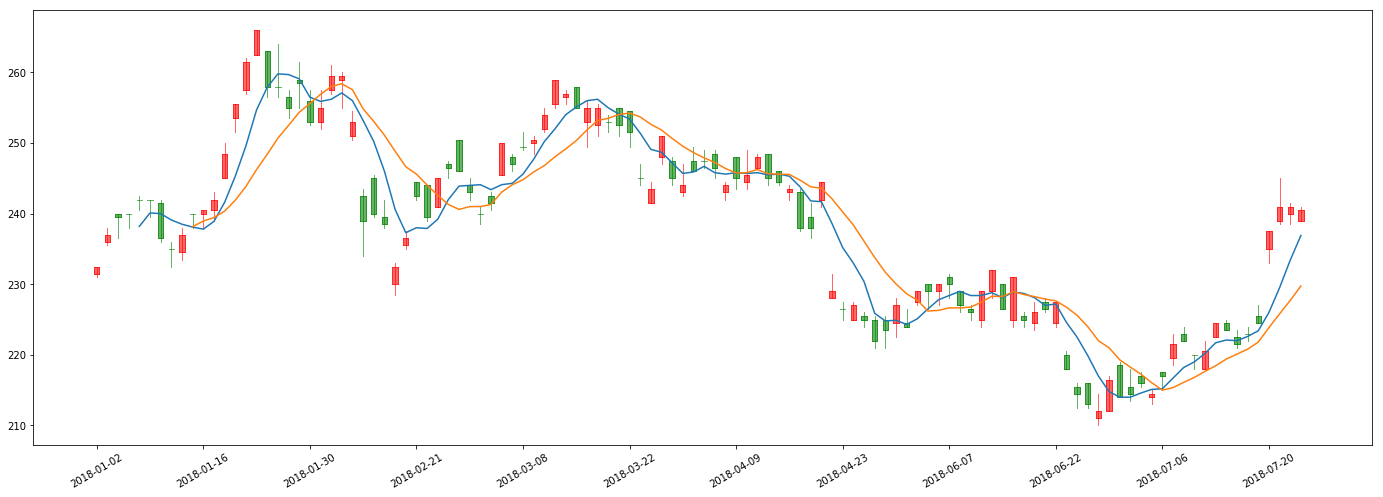

In [14]:
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
mpf.candlestick2_ochl(ax, tsmc.open, tsmc.close, tsmc.high, tsmc.low,
                      width=0.5, colorup='r', colordown='green',
                      alpha=0.6)
ax.plot(sma_5)
ax.plot(sma_10)
ax.set_xticks(range(0, len(tsmc_date['date']), 10))
ax.set_xticklabels(tsmc_date['date'].dt.strftime('%Y-%m-%d')[::10], rotation=30)

plt.show()

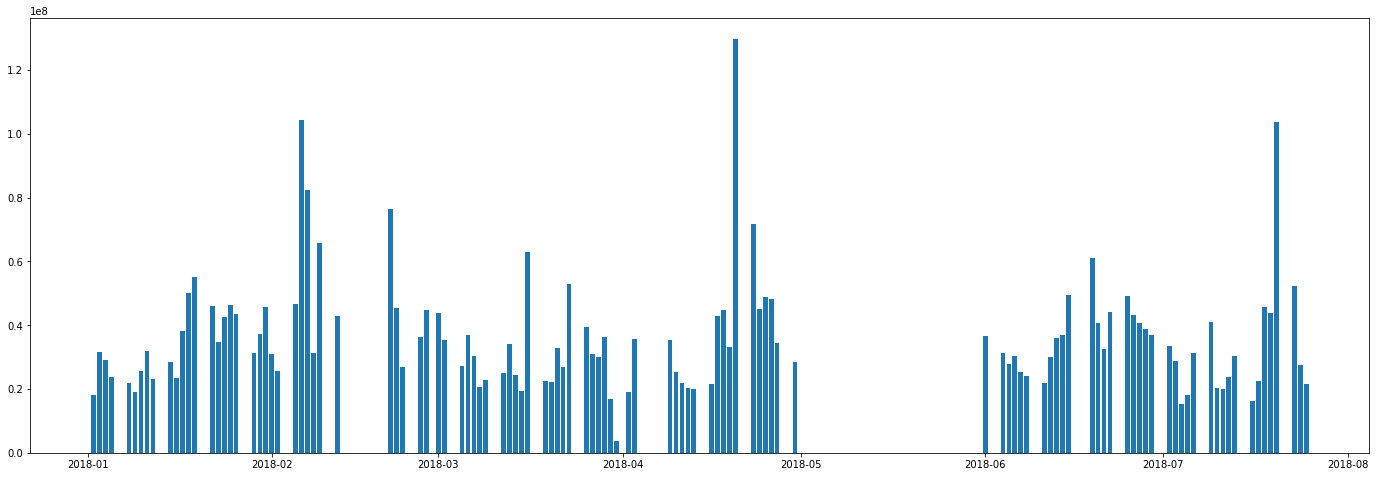

In [15]:
fig = plt.figure(figsize=(24, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(tsmc_date['date'],tsmc.capacity)
ax1.autoscale_view()

plt.show()

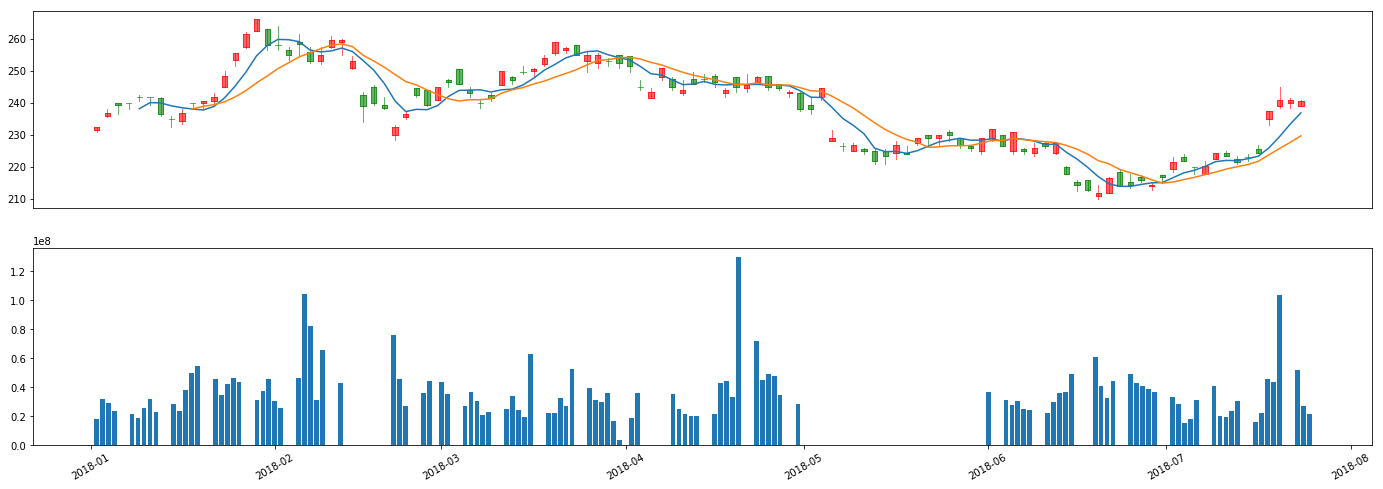

In [16]:
fig = plt.figure(figsize=(24, 8))
ax1 = fig.add_subplot(2, 1, 1)
mpf.candlestick2_ochl(ax1, tsmc.open, tsmc.close, tsmc.high, tsmc.low,
                      width=0.5, colorup='r', colordown='green',
                      alpha=0.6)
ax1.plot(sma_5)
ax1.plot(sma_10)

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)

ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(tsmc_date['date'],tsmc.capacity)
ax2.autoscale_view()

plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

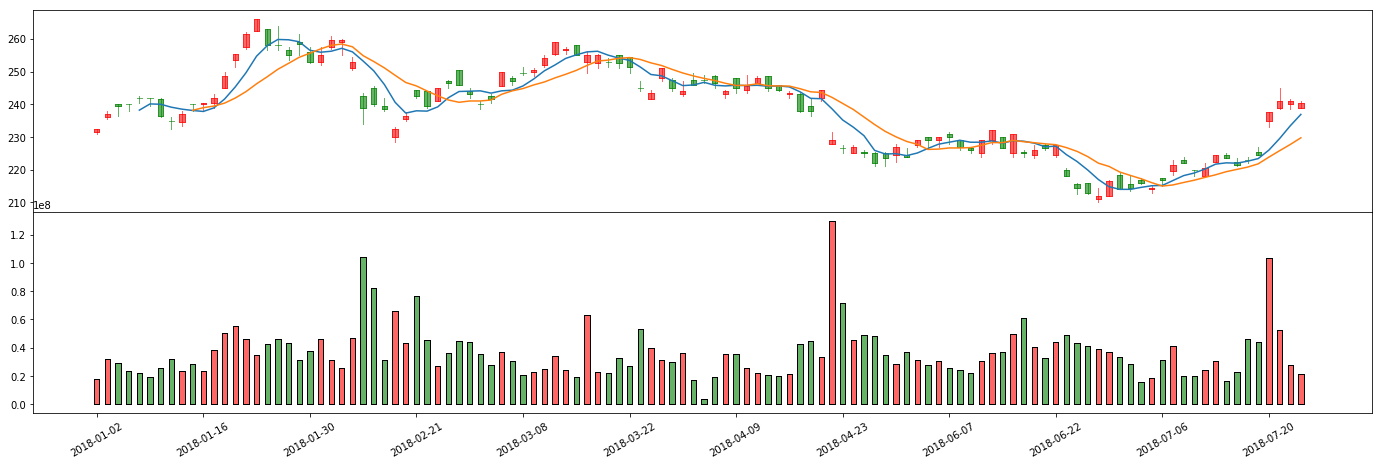

In [17]:
fig = plt.figure(figsize=(24, 8))
ax1 = fig.add_subplot(2, 1, 1)
mpf.candlestick2_ochl(ax1, tsmc.open, tsmc.close, tsmc.high, tsmc.low,
                      width=0.5, colorup='r', colordown='green',
                      alpha=0.6)
ax1.plot(sma_5)
ax1.plot(sma_10)

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)

ax2 = fig.add_subplot(2, 1, 2)
mpf.volume_overlay(ax2, tsmc.open, tsmc.close, tsmc.capacity,
                   width=0.5, colorup='r', colordown='g',
                   alpha=0.6)

ax2.set_xticks(range(0, len(tsmc_date['date']), 10))
ax2.set_xticklabels(tsmc_date['date'].dt.strftime('%Y-%m-%d')[::10], rotation=30)

plt.setp(plt.gca().get_xticklabels(), rotation=30)
#plt.setp(ax1.get_xticklabels(),visible = False)
#plt.setp(ax1.yaxis.get_ticklabels()[0], visible = False)
plt.subplots_adjust(bottom=0.20, top=0.90, hspace=0)

plt.show()

In [18]:
tsmc_df_date = pd.DataFrame(tsmc.date,columns=['ds'])
tsmc_df_price = pd.DataFrame(tsmc.close,columns=['y'])
tsmc_df = pd.concat([tsmc_df_date,tsmc_df_price],axis=1)

In [19]:
tsmc_df.head()

,ds,y
0,2018-01-02,232.5
1,2018-01-03,237.0
2,2018-01-04,239.5
3,2018-01-05,240.0
4,2018-01-08,242.0


In [20]:
from fbprophet import Prophet
#tsmc_df['y'] = np.log(tsmc_df['y'])
model = Prophet()
model.fit(tsmc_df);
future = model.make_future_dataframe(periods=30) 
forecast = model.predict(future)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
figure=model.plot(forecast)

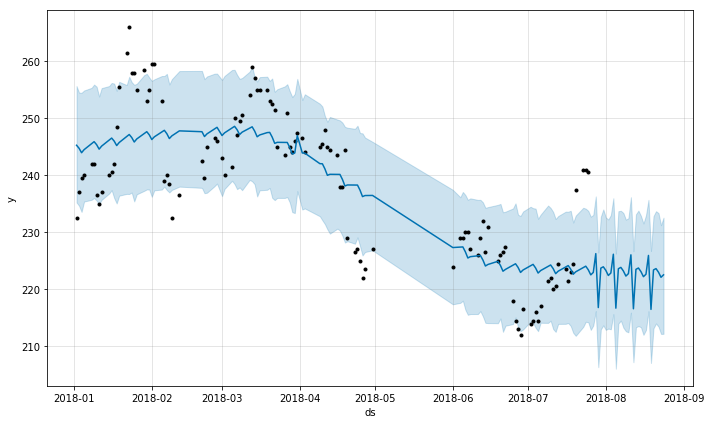

In [22]:
plt.show()